# Analysis of the English Premier League season 2013-2014
Introduction about the problem

## 1. Data cleaning

<font color='blue'>
First, call some library needed

In [1]:
#__reset__()
#from IPython import get_ipython
#get_ipython().magic('reset -sf') 

import numpy as np

import pandas as pd

import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

<font color='blue'>
load the data from csv file

In [2]:
EPL_df= pd.read_csv("premierleague.csv")
EPL_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 5 columns):
Date      380 non-null object
Team 1    380 non-null object
Team 2    380 non-null object
FT        380 non-null object
HT        380 non-null object
dtypes: object(5)
memory usage: 14.9+ KB


<font color='blue'>
The data is good, there is non-null object, so we don't need data cleaning, let's see the structure of the data

In [3]:
EPL_df.head(3)

,Date,Team 1,Team 2,FT,HT
0,2013-08-17,Arsenal,Aston Villa,1-3,1-1
1,2013-08-17,Liverpool,Stoke,1-0,1-0
2,2013-08-17,Norwich,Everton,2-2,0-0


<font color='blue'>
First, we want to rename the column of the dataframe to easy work with

In [4]:
EPL_df = EPL_df.rename(columns={'Team 1': 'Team_1', 'Team 2': 'Team_2'})
# We can replace " " to "_" in the column name if we want!
#EPL_df.columns = [c.replace(' ', '_') for c in EPL_df.columns]
EPL_df.head(3)

,Date,Team_1,Team_2,FT,HT
0,2013-08-17,Arsenal,Aston Villa,1-3,1-1
1,2013-08-17,Liverpool,Stoke,1-0,1-0
2,2013-08-17,Norwich,Everton,2-2,0-0


<font color='blue'>
Now, let's see how many clubs do we have? In principle, there should be 20 Home Teams and 20 Away Teams.

In [5]:
List_Home = EPL_df.Team_1.unique()
List_Away = EPL_df.Team_2.unique()
print ("The number of Home teams ", len(List_Home))
print (sorted(List_Home))
print ()
print ()
print ("The number of Away teams ", len(List_Away))
print (sorted(List_Away))

The number of Home teams  20
['Arsenal', 'Aston Villa', 'Cardiff', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Hull', 'Liverpool', 'Man City', 'Man United', 'Newcastle', 'Norwich', 'Southampton', 'Stoke', 'Sunderland', 'Swansea', 'Tottenham', 'West Brom', 'West Ham']


The number of Away teams  21
['Arsenal', 'Aston      Villa', 'Aston Villa', 'Cardiff', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Hull', 'Liverpool', 'Man City', 'Man United', 'Newcastle', 'Norwich', 'Southampton', 'Stoke', 'Sunderland', 'Swansea', 'Tottenham', 'West Brom', 'West Ham']


<font color='blue'>
There are 20 unique Home teams, that is correct, but the number of Away teams is 21, so there is a problem here. We found that for some reasons, Aston Villa appeared twice with different name 'Aston______Villa' and 'Aston Villa'. 

In [6]:
EPL_df['Team_2'] = EPL_df['Team_2'].replace('Aston      Villa', 'Aston Villa')

List_Home = EPL_df.Team_1.unique()
List_Away = EPL_df.Team_2.unique()
print ("The number of Home teams ", len(List_Home))
print (sorted(List_Home))
print ()
print ()
print ("The number of Away teams ", len(List_Away))
print (sorted(List_Away))

The number of Home teams  20
['Arsenal', 'Aston Villa', 'Cardiff', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Hull', 'Liverpool', 'Man City', 'Man United', 'Newcastle', 'Norwich', 'Southampton', 'Stoke', 'Sunderland', 'Swansea', 'Tottenham', 'West Brom', 'West Ham']


The number of Away teams  20
['Arsenal', 'Aston Villa', 'Cardiff', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Hull', 'Liverpool', 'Man City', 'Man United', 'Newcastle', 'Norwich', 'Southampton', 'Stoke', 'Sunderland', 'Swansea', 'Tottenham', 'West Brom', 'West Ham']


<font color='blue'>
Now, it is good, we also don't want to put the spaces in the names of the clubs. So let's remove it.

In [7]:
EPL_df.Team_1 = EPL_df.Team_1.str.replace(' ', '_')
EPL_df.Team_2 = EPL_df.Team_2.str.replace(' ', '_')
EPL_df.head(3)

,Date,Team_1,Team_2,FT,HT
0,2013-08-17,Arsenal,Aston_Villa,1-3,1-1
1,2013-08-17,Liverpool,Stoke,1-0,1-0
2,2013-08-17,Norwich,Everton,2-2,0-0


<font color='blue'>
The last check is that each club plays 19 times as a home team and 19 times as a away team.

In [8]:
def check_teams(Team):
    team_appear = EPL_df[Team].value_counts()
    print ("The name of the clubs and how many times it appears as ", Team)
    print ((team_appear))
    print ()
    print ()
    print ("The possible errors are: (if any):")
    err = team_appear[ team_appear+1 != len(team_appear) ]
    print (type(err), len(err))
    if (len(err) != 0 ):
        print ("Error while counting, STOP")
    else:
        print ("GOOD TO GO")
        print ()
        print ()

check_teams("Team_1")
check_teams("Team_2")
List_Home = EPL_df.Team_1.unique()
List_Away = EPL_df.Team_2.unique()

The name of the clubs and how many times it appears as  Team_1
Man_City          19
Sunderland        19
Swansea           19
Hull              19
Fulham            19
Crystal_Palace    19
West_Brom         19
Cardiff           19
West_Ham          19
Man_United        19
Stoke             19
Norwich           19
Newcastle         19
Aston_Villa       19
Southampton       19
Everton           19
Chelsea           19
Arsenal           19
Tottenham         19
Liverpool         19
Name: Team_1, dtype: int64


The possible errors are: (if any):
<class 'pandas.core.series.Series'> 0
GOOD TO GO


The name of the clubs and how many times it appears as  Team_2
Man_City          19
Sunderland        19
Swansea           19
Hull              19
Fulham            19
Crystal_Palace    19
Arsenal           19
West_Brom         19
West_Ham          19
Cardiff           19
Southampton       19
Stoke             19
Norwich           19
Aston_Villa       19
Everton           19
Chelsea           19
New

<font color='blue'>
Now, we can work with the data of the club that we care, for example "Man_United"

In [9]:
#if you care only about Arsenal
nameClub = 'Man_United'
aa = EPL_df.loc[EPL_df['Team_1'] == nameClub]
aa.head(3)

,Date,Team_1,Team_2,FT,HT
20,2013-08-26,Man_United,Chelsea,0-0,0-0
34,2013-09-14,Man_United,Crystal_Palace,2-0,1-0
53,2013-09-28,Man_United,West_Brom,1-2,0-0


<font color='blue'>
If we care about one certain match, for example "Man_United" vs. "Arsenal"

In [10]:
nameClub1 = 'Man_United'
nameClub2 = 'Arsenal'
EPL_df.loc[ (EPL_df['Team_1'] == nameClub1) & (EPL_df['Team_2'] == nameClub2)]

,Date,Team_1,Team_2,FT,HT
106,2013-11-10,Man_United,Arsenal,1-0,1-0


## 2. Analyze the data
<font color='blue'>
Everything is ok, first have some statistic about the data

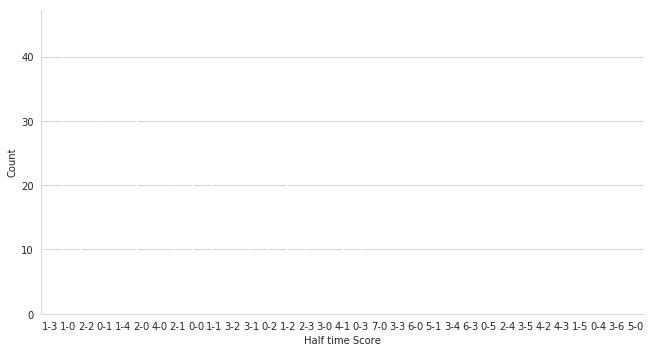

In [11]:
sns.set_style("whitegrid")
g=sns.catplot("FT",data=EPL_df,hue="FT",kind='count', height=5, aspect=1.8,palette="winter",legend_out=False)
g.set_axis_labels("Half time Score", "Count")
#sns.plt.title("Half time Score statistic")
#g.set(ylim=(0, 30))
#g.despine(left=True)  
rc={'axes.labelsize': 16, 'font.size': 22.0, 'legend.fontsize': 16, 'axes.titlesize': 20}
sns.set(rc=rc)

<font color='blue'>
About the score, the distribution shows that the score is likely to be '1-0', '1-1', '0-0', and '2-1', i.e. meaning that this league seems to be very competitive, and the Home team is likely to win/draw.
The next four largest distributions are '0-3', '1-3', '3-0', and '4-1'. It probably a little supprise that '0-3' and '1-3' appear here.

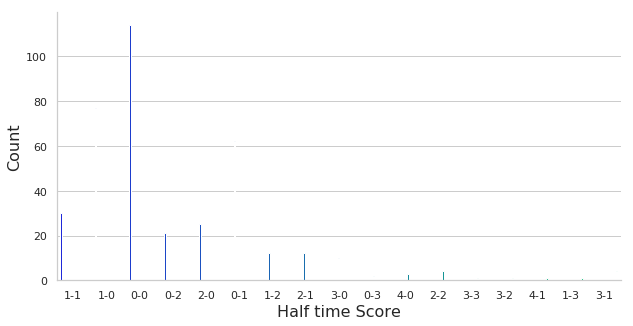

In [12]:
sns.set_style("whitegrid")
g=sns.catplot("HT",data=EPL_df,hue="HT",kind='count', height=5, aspect=1.8,palette="winter",legend_out=False)
g.set_axis_labels("Half time Score", "Count")
#sns.plt.title("Half time Score statistic")
#g.set(ylim=(0, 30))
#g.despine(left=True)  
rc={'axes.labelsize': 16, 'font.size': 22.0, 'legend.fontsize': 16, 'axes.titlesize': 20}
sns.set(rc=rc)

<font color='blue'>
If we look at only the first half of the game, the scores of '0-0', '1-0' and '0-1' have largest distributions, it is very hard to win more than 1 goal in the first half.

<br />

The next four largest distributions are '1-1', '0-2', '2-0', '1-2', '2-1' and '3-0'.
</font>


In [13]:
def sumgoals(score):
    score = score.split("-")
    return str(int(score[0])+int(score[1]))

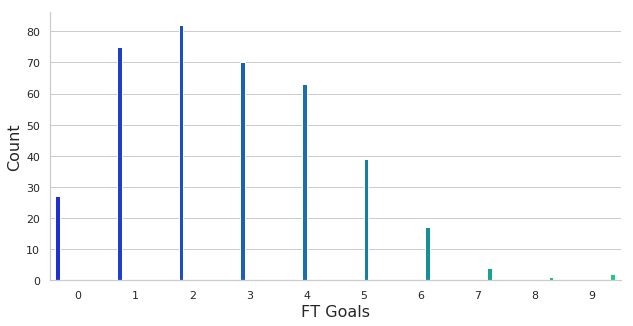

In [14]:
EPL_df['FTgoals'] = EPL_df['FT'].apply(sumgoals)
sns.set_style("whitegrid")
g=sns.catplot("FTgoals",data=EPL_df,hue="FTgoals",kind='count', height=5, aspect=1.8,palette="winter",legend_out=False)
g.set_axis_labels("FT Goals", "Count")
#sns.plt.title("Full time Goals statistic")
#g.set(ylim=(0, 30))
#g.despine(left=True)  
rc={'axes.labelsize': 16, 'font.size': 22.0, 'legend.fontsize': 16, 'axes.titlesize': 20}
sns.set(rc=rc)

<font color='blue'>
The distribution of the goals in a match has a Poisson-type Distribution.

<br />

The number of goals is likely to be 1, 2, 3 or 4.
</font>


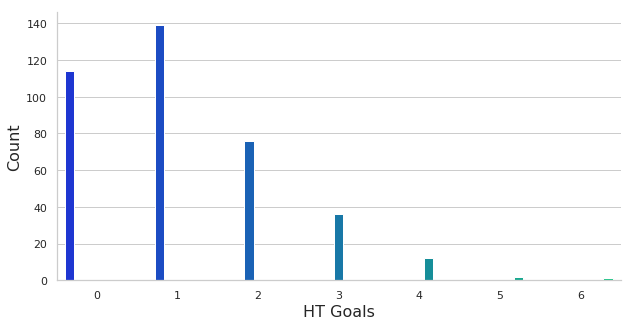

In [15]:
EPL_df['HTgoals'] = EPL_df['HT'].apply(sumgoals)
sns.set_style("whitegrid")
g=sns.catplot("HTgoals",data=EPL_df,hue="HTgoals",kind='count', height=5, aspect=1.8,palette="winter",legend_out=False)
g.set_axis_labels("HT Goals", "Count")
#sns.plt.title("Half time Goals statistic")
#g.set(ylim=(0, 30))
#g.despine(left=True)  
rc={'axes.labelsize': 16, 'font.size': 22.0, 'legend.fontsize': 16, 'axes.titlesize': 20}
sns.set(rc=rc)

<font color='blue'>
The distribution of the goals in the first half also is Poisson-type Distribution.

<br />

The number of goals is likely to be 0, 1, or 2
</font>


In [16]:
def Home_Win_Loss_Draw(score):
    score = score.split("-")
    if (int(score[0]) > int(score[1])):
        return "Home_Win"
    elif (int(score[0]) == int(score[1])):
        return "Home_Draw"
    else:
        return "Home_Loss"

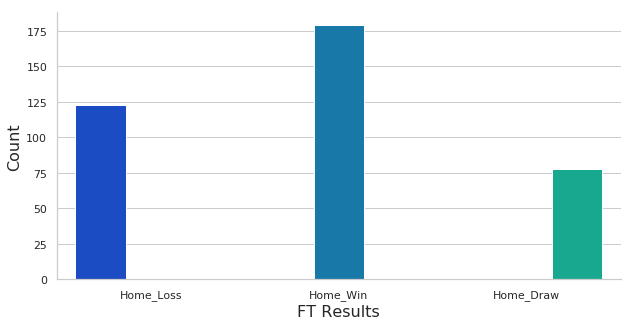

In [17]:
EPL_df['FTresults'] = EPL_df['FT'].apply(Home_Win_Loss_Draw)
sns.set_style("whitegrid")
g=sns.catplot("FTresults",data=EPL_df,hue="FTresults",kind='count', height=5, aspect=1.8,palette="winter",legend_out=False)
g.set_axis_labels("FT Results", "Count")
#sns.plt.title("Full time Results statistic")
#g.set(ylim=(0, 30))
#g.despine(left=True)  
rc={'axes.labelsize': 16, 'font.size': 22.0, 'legend.fontsize': 16, 'axes.titlesize': 20}
sns.set(rc=rc)

<font color='blue'>
This distribution shows that the Home team usually win the game, which is understandable, since Home team gets more supports.

<br />

It is a little suprise that Home team has more probability of lose the game than draw...
</font>


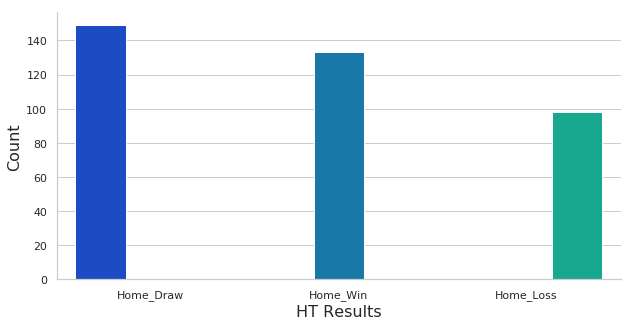

In [18]:
EPL_df['HTresults'] = EPL_df['HT'].apply(Home_Win_Loss_Draw)
sns.set_style("whitegrid")
g=sns.catplot("HTresults",data=EPL_df,hue="HTresults",kind='count', height=5, aspect=1.8,palette="winter",legend_out=False)
g.set_axis_labels("HT Results", "Count")
#sns.plt.title("Half time Results statistic")
#g.set(ylim=(0, 30))
#g.despine(left=True)  
rc={'axes.labelsize': 16, 'font.size': 22.0, 'legend.fontsize': 16, 'axes.titlesize': 20}
sns.set(rc=rc)

<font color='blue'>
Couting only the first half of the game, the Home team likely get draw results.
And in the second half, they play attack soccer to try to win the game.
It becomes clearly if we merge the results of first half and full time, as I did below
</font>

In [19]:
def HT_to_FT_change(scores):
    HT, FT = scores
    HT = HT.split("-")
    if (int(HT[0]) > int(HT[1])):
        str1 = "HT_Home_Win"
    elif (int(HT[0]) == int(HT[1])):
        str1 = "HT_Home_Draw"
    else:
        str1 = "HT_Home_Loss"
    FT = FT.split("-")
    if (int(FT[0]) > int(FT[1])):
        str2 = "FT_Home_Win"
    elif (int(FT[0]) == int(FT[1])):
        str2 = "FT_Home_Draw"
    else:
        str2 = "FT_Home_Loss"
    return str.join('--', ( str1, str2 ))

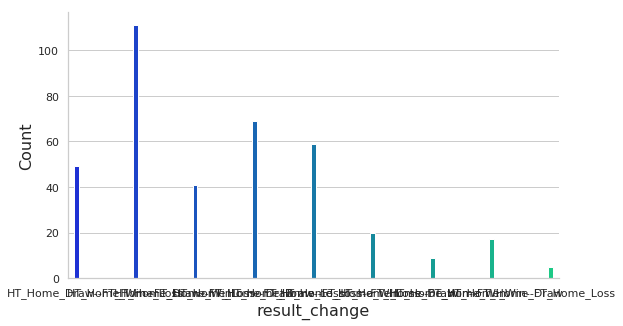

In [20]:
EPL_df['result_change'] = EPL_df[['HT','FT']].apply(HT_to_FT_change, axis=1)
sns.set_style("whitegrid")
g=sns.catplot("result_change",data=EPL_df,hue="result_change",kind='count', height=5, aspect=1.8,palette="winter",legend_out=True)
g.set_axis_labels("result_change", "Count")
#sns.plt.title("result_change statistic")
rc={'axes.labelsize': 16, 'font.size': 22.0, 'legend.fontsize': 16, 'axes.titlesize': 20}
sns.set(rc=rc)

It is difficult to see the statistic, since the x-axis is not clear, so we need another way to describe it

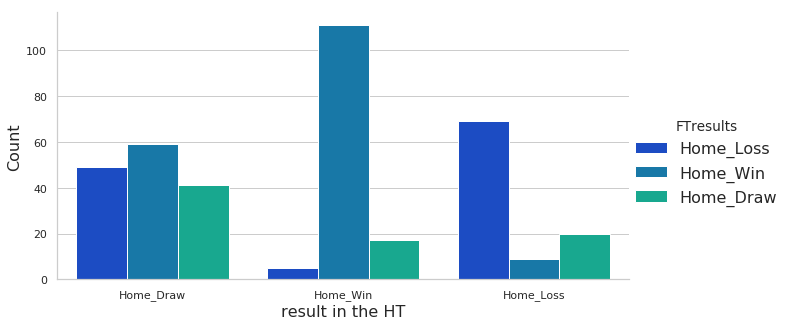

In [21]:
sns.set_style("whitegrid")
g=sns.catplot("HTresults",data=EPL_df,hue="FTresults",kind='count', height=5, aspect=1.8,palette="winter",legend_out=True)
g.set_axis_labels("result in the HT", "Count")
#sns.plt.title("result_change statistic")
rc={'axes.labelsize': 16, 'font.size': 22.0, 'legend.fontsize': 16, 'axes.titlesize': 20}
sns.set(rc=rc)

## 3. Calculations

In [22]:
## convert numpy.ndarray to list
#print (team1_appear.index.values)
teamlist = [tup for tup in  List_Home]
#print (teamlist)
rank = [0] * len(teamlist)

d = {'Rank' : pd.Series(rank, index=teamlist),
     'Points' : pd.Series(rank, index=teamlist),
     'Plus_goals' : pd.Series(rank, index=teamlist),
     'Minus_goals' : pd.Series(rank, index=teamlist),
     'Rank_Home' : pd.Series(rank, index=teamlist),
     'Points_Home' : pd.Series(rank, index=teamlist),
     'Plus_goals_Home' : pd.Series(rank, index=teamlist),
     'Minus_goals_Home' : pd.Series(rank, index=teamlist),
     'Rank_Away' : pd.Series(rank, index=teamlist),
     'Points_Away' : pd.Series(rank, index=teamlist),
     'Plus_goals_Away' : pd.Series(rank, index=teamlist),
     'Minus_goals_Away' : pd.Series(rank, index=teamlist),
     
     'Rank_H1' : pd.Series(rank, index=teamlist),
     'Points_H1' : pd.Series(rank, index=teamlist),
     'Plus_goals_H1' : pd.Series(rank, index=teamlist),
     'Minus_goals_H1' : pd.Series(rank, index=teamlist),
     'Rank_Home_H1' : pd.Series(rank, index=teamlist),
     'Points_Home_H1' : pd.Series(rank, index=teamlist),
     'Plus_goals_Home_H1' : pd.Series(rank, index=teamlist),
     'Minus_goals_Home_H1' : pd.Series(rank, index=teamlist),
     'Rank_Away_H1' : pd.Series(rank, index=teamlist),
     'Points_Away_H1' : pd.Series(rank, index=teamlist),
     'Plus_goals_Away_H1' : pd.Series(rank, index=teamlist),
     'Minus_goals_Away_H1' : pd.Series(rank, index=teamlist),
     
     'Rank_H2' : pd.Series(rank, index=teamlist),
     'Points_H2' : pd.Series(rank, index=teamlist),
     'Plus_goals_H2' : pd.Series(rank, index=teamlist),
     'Minus_goals_H2' : pd.Series(rank, index=teamlist),
     'Rank_Home_H2' : pd.Series(rank, index=teamlist),
     'Points_Home_H2' : pd.Series(rank, index=teamlist),
     'Plus_goals_Home_H2' : pd.Series(rank, index=teamlist),
     'Minus_goals_Home_H2' : pd.Series(rank, index=teamlist),
     'Rank_Away_H2' : pd.Series(rank, index=teamlist),
     'Points_Away_H2' : pd.Series(rank, index=teamlist),
     'Plus_goals_Away_H2' : pd.Series(rank, index=teamlist),
     'Minus_goals_Away_H2' : pd.Series(rank, index=teamlist)}

#FINALPARA = pd.DataFrame(d, index=['Chelsea','Liverpool'])
FINALPARA = pd.DataFrame(d)
#FINALPARA


In [23]:
def add_one_match(team1, team2, FT, HT, FINALPARA):

    #print (FT)
    FT = FT.split("-")
    if (len(FT) != 2):
        print ("Error in the FT score", team1, team2, FT, HT, FINALPARA)
    
    #print (HT)
    HT = HT.split("-")
    if (len(HT) != 2):
        print ("Error in the HT score", team1, team2, FT, HT, FINALPARA)
    
    if (int(FT[0]) < int(HT[0])):
        print ("Error in the FT/HT score", team1, team2, FT, HT, FINALPARA)

    if (int(FT[1]) < int(HT[1])):
        print ("Error in the FT/HT score", team1, team2, FT, HT, FINALPARA)

    # team1 HOME
    FINALPARA.loc[team1, 'Plus_goals']  = FINALPARA.loc[team1, 'Plus_goals']  + int(FT[0])
    FINALPARA.loc[team1, 'Minus_goals'] = FINALPARA.loc[team1, 'Minus_goals'] + int(FT[1])
    FINALPARA.loc[team1, 'Plus_goals_Home']  = FINALPARA.loc[team1, 'Plus_goals_Home']  + int(FT[0])
    FINALPARA.loc[team1, 'Minus_goals_Home'] = FINALPARA.loc[team1, 'Minus_goals_Home'] + int(FT[1])
    # H1
    FINALPARA.loc[team1, 'Plus_goals_H1']  = FINALPARA.loc[team1, 'Plus_goals_H1']  + int(HT[0])
    FINALPARA.loc[team1, 'Minus_goals_H1'] = FINALPARA.loc[team1, 'Minus_goals_H1'] + int(HT[1])
    FINALPARA.loc[team1, 'Plus_goals_Home_H1']  = FINALPARA.loc[team1, 'Plus_goals_Home_H1']  + int(HT[0])
    FINALPARA.loc[team1, 'Minus_goals_Home_H1'] = FINALPARA.loc[team1, 'Minus_goals_Home_H1'] + int(HT[1])
    # H2
    FINALPARA.loc[team1, 'Plus_goals_H2']  = FINALPARA.loc[team1, 'Plus_goals_H2']  + (int(FT[0])-int(HT[0]))
    FINALPARA.loc[team1, 'Minus_goals_H2'] = FINALPARA.loc[team1, 'Minus_goals_H2'] + (int(FT[1])-int(HT[1]))
    FINALPARA.loc[team1, 'Plus_goals_Home_H2']  = FINALPARA.loc[team1, 'Plus_goals_Home_H2']  + (int(FT[0])-int(HT[0]))
    FINALPARA.loc[team1, 'Minus_goals_Home_H2'] = FINALPARA.loc[team1, 'Minus_goals_Home_H2'] + (int(FT[1])-int(HT[1]))

    # team2 AWAY
    FINALPARA.loc[team2, 'Plus_goals']  = FINALPARA.loc[team2, 'Plus_goals']  + int(FT[1])
    FINALPARA.loc[team2, 'Minus_goals'] = FINALPARA.loc[team2, 'Minus_goals'] + int(FT[0])
    FINALPARA.loc[team2, 'Plus_goals_Away']  = FINALPARA.loc[team2, 'Plus_goals_Away']  + int(FT[1])
    FINALPARA.loc[team2, 'Minus_goals_Away'] = FINALPARA.loc[team2, 'Minus_goals_Away'] + int(FT[0])
    # H1
    FINALPARA.loc[team2, 'Plus_goals_H1']  = FINALPARA.loc[team2, 'Plus_goals_H1']  + int(HT[1])
    FINALPARA.loc[team2, 'Minus_goals_H1'] = FINALPARA.loc[team2, 'Minus_goals_H1'] + int(HT[0])
    FINALPARA.loc[team2, 'Plus_goals_Away_H1']  = FINALPARA.loc[team2, 'Plus_goals_Away_H1']  + int(HT[1])
    FINALPARA.loc[team2, 'Minus_goals_Away_H1'] = FINALPARA.loc[team2, 'Minus_goals_Away_H1'] + int(HT[0])
    # H2
    FINALPARA.loc[team2, 'Plus_goals_H2']  = FINALPARA.loc[team2, 'Plus_goals_H2']  + (int(FT[1])-int(HT[1]))
    FINALPARA.loc[team2, 'Minus_goals_H2'] = FINALPARA.loc[team2, 'Minus_goals_H2'] + (int(FT[0])-int(HT[0]))
    FINALPARA.loc[team2, 'Plus_goals_Away_H2']  = FINALPARA.loc[team2, 'Plus_goals_Away_H2']  + (int(FT[1])-int(HT[1]))
    FINALPARA.loc[team2, 'Minus_goals_Away_H2'] = FINALPARA.loc[team2, 'Minus_goals_Away_H2'] + (int(FT[0])-int(HT[0]))
    
    # points
    
    # Full Time
    if ( int(FT[0]) > int(FT[1]) ):
        FINALPARA.loc[team1, 'Points']  = FINALPARA.loc[team1, 'Points']  + 3
        FINALPARA.loc[team1, 'Points_Home']  = FINALPARA.loc[team1, 'Points_Home']  + 3
        
    elif ( int(FT[0]) == int(FT[1]) ):
        FINALPARA.loc[team1, 'Points']  = FINALPARA.loc[team1, 'Points']  + 1
        FINALPARA.loc[team1, 'Points_Home']  = FINALPARA.loc[team1, 'Points_Home']  + 1
        FINALPARA.loc[team2, 'Points']  = FINALPARA.loc[team2, 'Points']  + 1
        FINALPARA.loc[team2, 'Points_Away']  = FINALPARA.loc[team2, 'Points_Away']  + 1
    else:
        FINALPARA.loc[team2, 'Points']  = FINALPARA.loc[team2, 'Points']  + 3
        FINALPARA.loc[team2, 'Points_Away']  = FINALPARA.loc[team2, 'Points_Away']  + 3
    
    # Half Time 1
    if ( int(HT[0]) > int(HT[1]) ):
        FINALPARA.loc[team1, 'Points_H1']  = FINALPARA.loc[team1, 'Points_H1']  + 3
        FINALPARA.loc[team1, 'Points_Home_H1']  = FINALPARA.loc[team1, 'Points_Home_H1']  + 3
    elif ( int(HT[0]) == int(HT[1]) ):
        FINALPARA.loc[team1, 'Points_H1']  = FINALPARA.loc[team1, 'Points_H1']  + 1
        FINALPARA.loc[team1, 'Points_Home_H1']  = FINALPARA.loc[team1, 'Points_Home_H1']  + 1
        FINALPARA.loc[team2, 'Points_H1']  = FINALPARA.loc[team2, 'Points_H1']  + 1
        FINALPARA.loc[team2, 'Points_Away_H1']  = FINALPARA.loc[team2, 'Points_Away_H1']  + 1
    else:
        FINALPARA.loc[team2, 'Points_H1']  = FINALPARA.loc[team2, 'Points_H1']  + 3
        FINALPARA.loc[team2, 'Points_Away_H1']  = FINALPARA.loc[team2, 'Points_Away_H1']  + 3
    
    # Half Time 2
    if ( int(FT[0])-int(HT[0]) > int(FT[1])-int(HT[1]) ):
        FINALPARA.loc[team1, 'Points_H2']  = FINALPARA.loc[team1, 'Points_H2']  + 3
        FINALPARA.loc[team1, 'Points_Home_H2']  = FINALPARA.loc[team1, 'Points_Home_H2']  + 3
    elif ( int(FT[0])-int(HT[0]) == int(FT[1])-int(HT[1]) ):
        FINALPARA.loc[team1, 'Points_H2']  = FINALPARA.loc[team1, 'Points_H2']  + 1
        FINALPARA.loc[team1, 'Points_Home_H2']  = FINALPARA.loc[team1, 'Points_Home_H2']  + 1
        FINALPARA.loc[team2, 'Points_H2']  = FINALPARA.loc[team2, 'Points_H2']  + 1
        FINALPARA.loc[team2, 'Points_Away_H2']  = FINALPARA.loc[team2, 'Points_Away_H2']  + 1
    else:
        FINALPARA.loc[team2, 'Points_H2']  = FINALPARA.loc[team2, 'Points_H2']  + 3
        FINALPARA.loc[team2, 'Points_Away_H2']  = FINALPARA.loc[team2, 'Points_Away_H2']  + 3

In [24]:
for index, row in EPL_df.iterrows():
    team1 = row['Team_1']
    team2 = row['Team_2']
    FT = row['FT']
    HT = row['HT']
    add_one_match(team1, team2, FT, HT, FINALPARA)

In [25]:
aa = FINALPARA.sort_values(['Points','Plus_goals'], ascending=[False, False])
aa[['Points','Plus_goals','Minus_goals']]

,Points,Plus_goals,Minus_goals
Man_City,86,102,37
Liverpool,84,101,50
Chelsea,82,71,27
Arsenal,79,68,41
Everton,72,61,39
Tottenham,69,55,51
Man_United,64,64,43
Southampton,56,54,46
Stoke,50,45,52
Newcastle,49,43,59


In [26]:
aa = FINALPARA.sort_values(['Points_Home','Plus_goals_Home'], ascending=[False, False])
aa[['Points_Home','Plus_goals_Home','Minus_goals_Home']]

,Points_Home,Plus_goals_Home,Minus_goals_Home
Man_City,52,63,13
Liverpool,49,53,18
Chelsea,48,43,11
Arsenal,44,36,11
Everton,42,38,19
Tottenham,36,30,23
Stoke,36,27,17
Southampton,30,32,23
Man_United,30,29,21
Newcastle,27,23,28


In [27]:
aa = FINALPARA.sort_values(['Points_Away','Plus_goals_Away'], ascending=[False, False])
aa[['Points_Away','Plus_goals_Away','Minus_goals_Away']]

,Points_Away,Plus_goals_Away,Minus_goals_Away
Liverpool,35,48,32
Arsenal,35,32,30
Man_City,34,39,24
Man_United,34,35,22
Chelsea,34,28,16
Tottenham,33,25,28
Everton,30,23,20
Southampton,26,22,23
Newcastle,22,20,31
Sunderland,20,20,33


In [28]:
aa = FINALPARA.sort_values(['Points_H1','Plus_goals_H1'], ascending=[False, False])
aa[['Points_H1','Plus_goals_H1','Minus_goals_H1']]

,Points_H1,Plus_goals_H1,Minus_goals_H1
Man_City,84,46,14
Liverpool,82,59,21
Chelsea,66,30,11
Arsenal,59,25,20
Southampton,55,28,19
Man_United,55,27,22
Everton,51,20,17
Stoke,49,23,20
Newcastle,49,21,24
Tottenham,47,20,25


In [29]:
aa = FINALPARA.sort_values(['Points_H2','Plus_goals_H2'], ascending=[False, False])
aa[['Points_H2','Plus_goals_H2','Minus_goals_H2']]

,Points_H2,Plus_goals_H2,Minus_goals_H2
Man_City,77,56,23
Arsenal,76,43,21
Everton,68,41,22
Tottenham,68,35,26
Chelsea,67,41,16
Man_United,63,37,21
Liverpool,58,42,29
Southampton,51,26,27
West_Brom,51,24,25
Swansea,50,34,30


In [30]:
aa = FINALPARA.sort_values(['Points_Home_H1','Plus_goals_Home_H1'], ascending=[False, False])
aa[['Points_Home_H1','Plus_goals_Home_H1','Minus_goals_Home_H1']]

,Points_Home_H1,Plus_goals_Home_H1,Minus_goals_Home_H1
Liverpool,46,34,6
Man_City,46,29,7
Chelsea,38,21,6
Arsenal,35,15,5
Southampton,32,16,7
Everton,30,16,9
Hull,29,11,9
Man_United,29,11,8
West_Ham,26,12,11
Stoke,26,10,8


In [31]:
aa = FINALPARA.sort_values(['Points_Home_H2','Plus_goals_Home_H2'], ascending=[False, False])
aa[['Points_Home_H2','Plus_goals_Home_H2','Minus_goals_Home_H2']]

,Points_Home_H2,Plus_goals_Home_H2,Minus_goals_Home_H2
Man_City,48,34,6
Arsenal,42,21,6
Everton,38,22,10
Chelsea,35,22,5
Tottenham,33,18,12
Stoke,33,17,9
Liverpool,32,19,12
Man_United,29,18,13
West_Brom,29,13,14
Swansea,28,24,16


In [32]:
aa = FINALPARA.sort_values(['Points_Away_H1','Plus_goals_Away_H1'], ascending=[False, False])
aa[['Points_Away_H1','Plus_goals_Away_H1','Minus_goals_Away_H1']]

,Points_Away_H1,Plus_goals_Away_H1,Minus_goals_Away_H1
Man_City,38,17,7
Liverpool,36,25,15
Chelsea,28,9,5
Man_United,26,16,14
Newcastle,25,11,14
Arsenal,24,10,15
Aston_Villa,24,10,14
Stoke,23,13,12
Southampton,23,12,12
Tottenham,23,8,14


In [33]:
aa = FINALPARA.sort_values(['Points_Away_H2','Plus_goals_Away_H2'], ascending=[False, False])
aa[['Points_Away_H2','Plus_goals_Away_H2','Minus_goals_Away_H2']]

,Points_Away_H2,Plus_goals_Away_H2,Minus_goals_Away_H2
Tottenham,35,17,14
Arsenal,34,22,15
Man_United,34,19,8
Chelsea,32,19,11
Everton,30,19,12
Man_City,29,22,17
Liverpool,26,23,17
Southampton,26,10,11
Sunderland,23,11,19
West_Brom,22,11,11
